In [ ]:
!pip install ipython-autotime
%load_ext autotime
import pandas as pd
import numpy as np
import json
from pprint import pprint
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 50)
pd.set_option("display.precision", 2)

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=0ba48322a90a022d1b6d52ea3e99a3c158778e5a3982b5557a1e09f4a4c4a43a
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
time: 20.1 s


In [ ]:
path = "/content/drive/My Drive/data/letsmd.leads.json"
with open(path) as f:
    data = json.load(f)


time: 1.74 s


In [ ]:
x = set([])
y = set([])
credit_count = {}
debit_count = {}
credit_total = {}
debit_total = {}
credit_avg = {}
debit_avg = {}

for item in data:
  for i in item['bankStatementTransactionsObject'].values():
    for j in i:
      if j['type'] == "CREDIT":
        if j['category'] in credit_count:
          credit_count[j['category']] += 1
          credit_total[j['category']] += j['amount']
        else:
          credit_count[j['category']] = 1
          credit_total[j['category']] = j['amount']
        x.add(j['category'])
      else:
        if j['category'] in debit_count:
          debit_count[j['category']] += 1
          debit_total[j['category']] += j['amount']
        else:
          debit_count[j['category']] = 1
          debit_total[j['category']] = j['amount']
        y.add(j['category'])


time: 200 ms


In [ ]:
print(x)

{'INTEREST', 'REVERSAL', 'INWARD_CHEQUE_RETURN', 'CHEQUE_PAID', 'PAYMENT_RECEIVED', 'CASH_DEPOSIT', 'RTGS', 'CASHBACK', 'CHEQUE_COLLECTION', 'NEFT_RETURN', 'SELF_WITHDRAW', 'ECS_BOUNCE', 'ATM_REVERSAL', 'INVESTMENT_INCOME', 'PENALTY', 'INTEREST_OVERDRAFT', 'POS_SETTLEMENT', 'TPT', 'ATM_MONEY_TRANSFER', 'CHEQUE_BOUNCE', 'INVESTMENT', 'NEFT', 'INVESTMENT_PRINCIPAL', 'LOAN', 'INTRA_BANK_TRANSFER', 'SALARY', 'IMPS', 'CHARGES', 'MOBILE_MONEY_TRANSFER', 'OTHER', 'REFUND', 'REIMBURSEMENT', 'DIVIDEND', 'OPENING_BALANCE', 'CHEQUE_RETURN', 'UNIFIED_PAYMENT', 'MOBILE_BANKING', 'TAX', 'INTERNAL_PAYMENT', 'ECS', 'INTERNET_FUND_TRANSFER', 'BANK_TRANSFER', 'CARD_PAYMENT', 'NACH', 'ONLINE_PAYMENT', 'MONEY_RECEIVED', 'FOREX_TXN'}
time: 1.62 ms


In [ ]:
print(y)

{'INTEREST', 'DONATION', 'CHEQUE_PAID', 'REVERSAL', 'INWARD_CHEQUE_RETURN', 'TRANSFER_TO_BANK', 'ECS_PENALTY', 'MOBILE_BILL', 'FIXED_DEPOSIT', 'RTGS', 'MUTUAL_FUND', 'SUBSCRIPTION', 'TRANSFER_TO_WALLET', 'FOREX_TXN', 'NEFT_RETURN', 'TRAVEL', 'SELF_WITHDRAW', 'ATM_WITHDRAWAL_CHARGES', 'PENALTY', 'FUEL', 'TPT', 'CHEQUE_BOUNCE', 'INVESTMENT', 'LOAN_FEES', 'NEFT', 'RENT', 'ATM_DECLINE_CHARGES', 'ENTERTAINMENT', 'COMMISSION', 'IMPS', 'CHARGES', 'MOBILE_MONEY_TRANSFER', 'EMI', 'OTHER', 'UTILITY_BILL', 'REFUND', 'MONEY_SENT', 'REPETITIVE_PAYMENT', 'CASH_WITHDRAW', 'FOOD_RESTAURANT', 'UNIFIED_PAYMENT', 'BUSINESS_EXPENSES', 'LOAN_REPAYMENT', 'CREDIT_CARD_PAYMENT', 'GENERAL_EXPENSES', 'MEDICAL_EXPENSES', 'SALARY_DISBURSED', 'EPFO', 'POS_PENALTY', 'E_COMMERCE', 'MOBILE_BANKING', 'PENAL_INTEREST', 'ATM_WITHDRAWAL', 'TAX', 'CARD_CHARGES', 'COST_OF_SERVICE', 'INTERNAL_PAYMENT', 'INTERNET_BILL', 'INSURANCE', 'ECS', 'INTERNET_FUND_TRANSFER', 'BANK_TRANSFER', 'CARD_PAYMENT', 'NACH', 'SHOPPING', 'TRANSA

In [ ]:
df_credit = pd.DataFrame([credit_count,credit_total])
df_credit.loc['newrow'] = df_credit.iloc[1] / df_credit.iloc[0]
df_credit.astype(int)

,OPENING_BALANCE,MONEY_RECEIVED,OTHER,INTEREST,CASH_DEPOSIT,UNIFIED_PAYMENT,REFUND,INTERNAL_PAYMENT,CHEQUE_COLLECTION,NEFT,SALARY,LOAN,PENALTY,POS_SETTLEMENT,TAX,BANK_TRANSFER,ATM_REVERSAL,RTGS,INTERNET_FUND_TRANSFER,MOBILE_MONEY_TRANSFER,IMPS,SELF_WITHDRAW,CARD_PAYMENT,INVESTMENT_INCOME,TPT,ECS_BOUNCE,NEFT_RETURN,REVERSAL,ONLINE_PAYMENT,INWARD_CHEQUE_RETURN,MOBILE_BANKING,INTEREST_OVERDRAFT,DIVIDEND,CHEQUE_RETURN,INVESTMENT_PRINCIPAL,INVESTMENT,CHEQUE_PAID,CASHBACK,ECS,NACH,CHEQUE_BOUNCE,FOREX_TXN,ATM_MONEY_TRANSFER,REIMBURSEMENT,CHARGES,PAYMENT_RECEIVED,INTRA_BANK_TRANSFER
0,926,1583,3187,1337,7221,29436,4721,84,5404,6680,212,808,22,2519,11,778,126,393,1684,699,20826,11,232,127,470,177,33,781,35,6,91,2,160,130,259,7,9,22,7,32,34,3,1,4,3,1,1
1,-131934697,27222265,120643127,699273,504485206,116885617,7032263,6422362,447893824,542645556,6788465,49946534,2138491,18909932,195009,295701541,772667,272581990,77228876,27180534,205277322,322500,7202459,7057650,15984832,1636326,837092,3902174,561268,590000,1957876,1080,2270337,10854662,33422164,107676,288165,77,61844,80450,510139,682216,20000,80698,858259,500000,400000
newrow,-142478,17196,37854,523,69863,3970,1489,76456,82881,81234,32021,61815,97204,7506,17728,380079,6132,693592,45860,38884,9856,29318,31045,55572,34010,9244,25366,4996,16036,98333,21515,540,14189,83497,129043,15382,32018,3,8834,2514,15004,227405,20000,20174,286086,500000,400000


time: 127 ms


In [ ]:
edf_debit = pd.DataFrame([debit_count,debit_total])
df_debit.loc['newrow'] = df_debit.iloc[1] / df_debit.iloc[0]
df_debit.astype(int)

,ATM_WITHDRAWAL,MONEY_SENT,CARD_PAYMENT,TRANSFER_TO_BANK,UNIFIED_PAYMENT,CHEQUE_PAID,FUEL,E_COMMERCE,IMPS,MOBILE_BILL,INVESTMENT,CHARGES,OTHER,LOAN_REPAYMENT,TRANSFER_TO_WALLET,FOOD_RESTAURANT,ENTERTAINMENT,CHEQUE_RETURN_CHARGES,REPETITIVE_PAYMENT,INSURANCE,TRAVEL,ATM_WITHDRAWAL_CHARGES,INTERNET_FUND_TRANSFER,MOBILE_MONEY_TRANSFER,CASH_WITHDRAW,TAX,GENERAL_EXPENSES,CREDIT_CARD_PAYMENT,MEDICAL_EXPENSES,ONLINE_PAYMENT,RENT,INTERNAL_PAYMENT,UTILITY_BILL,SELF_WITHDRAW,BANK_TRANSFER,BUSINESS_EXPENSES,NACH,SUBSCRIPTION,CHEQUE_BOUNCE,NEFT,INTEREST_PAID,CARD_CHARGES,ECS,RTGS,SALARY_DISBURSED,TPT,SHOPPING,MOBILE_BANKING,REVERSAL,MUTUAL_FUND,REFUND,INWARD_CHEQUE_RETURN,FOREX_TXN,EMI,INTEREST,COST_OF_SERVICE,PENALTY,ECS_PENALTY,PENAL_INTEREST,DONATION,COMMISSION,TRANSACTION_STOCK_MARKET_ACCOUNT,ATM_DECLINE_CHARGES,POS_PENALTY,NEFT_RETURN,INTERNET_BILL,EPFO,FIXED_DEPOSIT,LOAN_FEES
0,18466,741,9521,311,38019,8989,499,4113,15087,2249,209,10798,10924,5498,9271,2103,623,1088,284,328,2399,1649,817,1713,466,1949,484,2045,344,1061,300,206,22,91,578,25,80,224,551,6587,38,110,134,219,1,701,110,92,86,97,16,2,23,87,7,43,11,449,46,5,6,176,22,13,2,2,121,5,22
1,108112955,33523141,23986290,4325756,134589596,555393489,346414,6923107,199352361,1424846,546797,23476519,584962072,76882545,7696825,1468398,269502,274690,1156548,2123649,7655525,-196160,19553258,49216834,29141541,30384007,997674,27343678,3135891,5634428,3749398,5530160,259159,3814451,320024285,170286,637052,486567,180285534,218246338,306120,107571,2611062,113130490,8000,35007111,220783,189453,3884892,245714,-57623,300000,54316,1190318,70,278534,341030,122154,399943,10500,47,763497,256,213,393000,1200,819250,1250000,1600
newrow,5854,45240,2519,13909,3540,61785,694,1683,13213,633,2616,2174,53548,13983,830,698,432,252,4072,6474,3191,-118,23932,28731,62535,15589,2061,13370,9115,5310,12497,26845,11779,41917,553675,6811,7963,2172,327196,33132,8055,977,19485,516577,8000,49938,2007,2059,45173,2533,-3601,150000,2361,13681,10,6477,31002,272,8694,2100,7,4338,11,16,196500,600,6770,250000,72


time: 113 ms


In [ ]:
rows = []
for item in data:
  for i in item['bankStatementTransactionsObject'].values():
    for j in i:
      row = j
      s = item['borrower']
      w = s['work']
      l = list(item['bankAccountABBs'].values())
      a = l[-1]
      # b = l[1] if 1 < len(l) else np.nan
      row.update({'lead_id':item['lead_id'], 'income': w['salary'],'abb':a}) 
      rows.append(j)

df = pd.DataFrame(rows)
df = df[['lead_id','income','abb','dateTime','type','category','amount','balanceAfterTransaction']]

time: 1.27 s


In [ ]:
df = df[(df['income'] > 5000) & (df['income'] < 500000)]
df.head()

,lead_id,income,abb,dateTime,type,category,amount,balanceAfterTransaction
0,11124,25009.0,4282.61,01/03/2018,CREDIT,OPENING_BALANCE,64.31,64.31
1,11124,25009.0,4282.61,01/03/2018,CREDIT,MONEY_RECEIVED,1860.00,1924.31
2,11124,25009.0,4282.61,01/03/2018,DEBIT,ATM_WITHDRAWAL,1800.00,124.31
3,11124,25009.0,4282.61,03/03/2018,CREDIT,MONEY_RECEIVED,5000.00,5124.31
4,11124,25009.0,4282.61,03/03/2018,CREDIT,MONEY_RECEIVED,5000.00,10124.31


time: 68.5 ms


In [ ]:
abb = df.groupby('lead_id')['abb'].mean()
df_abb = pd.DataFrame({"ABB": abb})

income = df.groupby('lead_id')['income'].mean()
df_income = pd.DataFrame({"INCOME": income})

amount = df[(df['category']=='FOOD_RESTAURANT')&(df['type']=='DEBIT')].groupby('lead_id')['amount'].mean()
df_dl = pd.DataFrame({"FOOD_RESTAURANT": amount})

amount = df[(df['category']=='TRANSFER_TO_WALLET')&(df['type']=='DEBIT')].groupby('lead_id')['amount'].mean()
df_dk = pd.DataFrame({"TRANSFER_TO_WALLET": amount})

amount = df[(df['category']=='INVESTMENT')&(df['type']=='DEBIT')].groupby('lead_id')['amount'].mean()
df_dj = pd.DataFrame({"INVESTMENT": amount})

amount = df[(df['category']=='MOBILE_BILL')&(df['type']=='DEBIT')].groupby('lead_id')['amount'].mean()
df_di = pd.DataFrame({"MOBILE_BILL": amount})

amount = df[(df['category']=='IMPS')&(df['type']=='DEBIT')].groupby('lead_id')['amount'].mean()
df_dh = pd.DataFrame({"IMPS": amount})

amount = df[(df['category']=='E_COMMERCE')&(df['type']=='DEBIT')].groupby('lead_id')['amount'].mean()
df_dg = pd.DataFrame({"E_COMMERCE": amount})

amount = df[(df['category']=='FUEL')&(df['type']=='DEBIT')].groupby('lead_id')['amount'].mean()
df_df = pd.DataFrame({"FUEL": amount})

amount = df[(df['category']=='CHEQUE_PAID')&(df['type']=='DEBIT')].groupby('lead_id')['amount'].mean()
df_de = pd.DataFrame({"CHEQUE_PAID": amount})

amount = df[(df['category']=='UNIFIED_PAYMENT')&(df['type']=='DEBIT')].groupby('lead_id')['amount'].mean()
df_dd = pd.DataFrame({"UNIFIED_PAYMENT": amount})

amount = df[(df['category']=='TRANSFER_TO_BANK')&(df['type']=='DEBIT')].groupby('lead_id')['amount'].mean()
df_dc = pd.DataFrame({"TRANSFER_TO_BANK": amount})

amount = df[(df['category']=='MONEY_SENT')&(df['type']=='DEBIT')].groupby('lead_id')['amount'].mean()
df_db = pd.DataFrame({"MONEY_SENT": amount})

atm = df[(df['category']=='ATM_WITHDRAWAL')&(df['type']=='DEBIT')].groupby('lead_id')['amount'].mean()
df_da = pd.DataFrame({"ATM_WITHDRAWAL": atm})

df_debit = pd.concat([df_income,df_abb,df_da,df_db,df_dc,df_dd,df_de,df_df,df_dg,df_dh,df_di,df_dj,df_dk,df_dl],axis=1)
df_debit['income_cat'] = np.where(df_debit.INCOME >= 25000,1,0)
df_debit.drop('INCOME',axis=1,inplace=True)
df_debit.head()

,ABB,ATM_WITHDRAWAL,MONEY_SENT,TRANSFER_TO_BANK,UNIFIED_PAYMENT,CHEQUE_PAID,FUEL,E_COMMERCE,IMPS,MOBILE_BILL,INVESTMENT,TRANSFER_TO_WALLET,FOOD_RESTAURANT,income_cat
lead_id,,,,,,,,,,,,,,
11124,4282.61,15582.35,9883.57,18921.67,100.00,4235.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
11318,4357.85,5796.14,NaN,2468.59,11118.57,100.00,330.0,376.78,10147.91,254.0,200.0,1849.40,326.0,1
12291,11490.61,2710.53,NaN,452.50,NaN,NaN,NaN,NaN,NaN,79.6,NaN,NaN,NaN,1
12816,14365.75,NaN,NaN,NaN,2642.54,700.00,NaN,278.00,500.00,NaN,NaN,3066.03,252.0,1
17107,136809.89,17125.00,NaN,NaN,NaN,12942.22,NaN,NaN,NaN,NaN,7090.0,NaN,NaN,1


time: 753 ms


(435, 14)


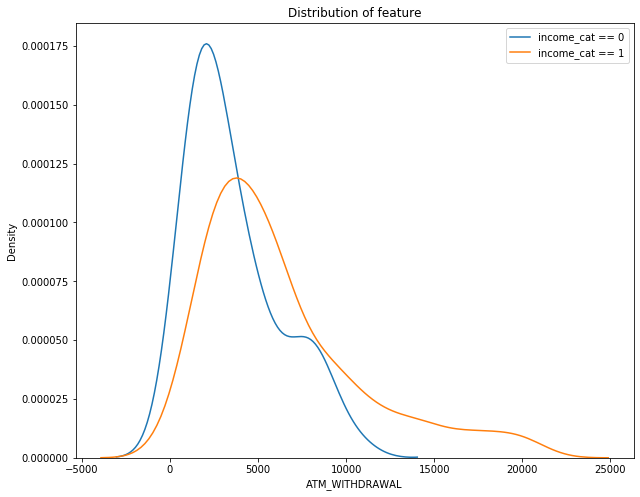

time: 316 ms


In [ ]:
col = "ATM_WITHDRAWAL"
print(df_debit[df_debit[col].notnull()].shape)
y = df_debit['income_cat']
X = df_debit.drop('income_cat',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
train_data = X_train.copy()
train_data['income_cat'] = y_train

plt.figure(figsize = (10, 8))

hq = train_data[col].quantile(0.98)
lq = train_data[col].quantile(0.02)

train_data = train_data[train_data[col] < hq]
train_data = train_data[train_data[col] > lq]

# KDE plot of income below 25k
sns.kdeplot(train_data.loc[train_data['income_cat'] == 0, col], label = 'income_cat == 0')

# KDE plot of income above 25k
sns.kdeplot(train_data.loc[train_data['income_cat'] == 1, col], label = 'income_cat == 1')

# Labeling of plot
plt.xlabel(col); plt.ylabel('Density'); plt.title('Distribution of feature');

In [ ]:
abb = df.groupby('lead_id')['abb'].mean()
df_abb = pd.DataFrame({"ABB": abb})

income = df.groupby('lead_id')['income'].mean()
df_income = pd.DataFrame({"INCOME": income})

atm = df[(df['category']=='ATM_WITHDRAWAL')&(df['type']=='DEBIT')].groupby('lead_id')['amount'].mean()
df_atm = pd.DataFrame({"ATM_WITHDRAWAL": atm})

amount = df[(df['category']=='DIVIDEND')&(df['type']=='CREDIT')].groupby('lead_id')['amount'].mean()
df_n = pd.DataFrame({'DIVIDEND': amount})

amount = df[(df['category']=='REVERSAL')&(df['type']=='CREDIT')].groupby('lead_id')['amount'].mean()
df_m = pd.DataFrame({'REVERSAL': amount})

amount = df[(df['category']=='NEFT_RETURN')&(df['type']=='CREDIT')].groupby('lead_id')['amount'].median()
df_l = pd.DataFrame({'NEFT_RETURN': amount})

amount = df[(df['category']=='ECS_BOUNCE')&(df['type']=='CREDIT')].groupby('lead_id')['amount'].mean()
df_k = pd.DataFrame({'ECS_BOUNCE': amount})

amount = df[(df['category']=='INVESTMENT_INCOME')&(df['type']=='CREDIT')].groupby('lead_id')['amount'].mean()
df_j = pd.DataFrame({'INVESTMENT_INCOME': amount})

amount = df[(df['category']=='POS_SETTLEMENT')&(df['type']=='CREDIT')].groupby('lead_id')['amount'].mean()
df_i = pd.DataFrame({'POS_SETTLEMENT': amount})

amount = df[(df['category']=='LOAN')&(df['type']=='CREDIT')].groupby('lead_id')['amount'].mean()
df_h = pd.DataFrame({'LOAN': amount})

amount = df[(df['category']=='SALARY')&(df['type']=='CREDIT')].groupby('lead_id')['amount'].mean()
df_g = pd.DataFrame({'SALARY': amount})

amount = df[(df['category']=='CHEQUE_COLLECTION')&(df['type']=='CREDIT')].groupby('lead_id')['amount'].mean()
df_f = pd.DataFrame({'CHEQUE_COLLECTION': amount})

amount = df[(df['category']=='INTERNAL_PAYMENT')&(df['type']=='CREDIT')].groupby('lead_id')['amount'].mean()
df_e = pd.DataFrame({'INTERNAL_PAYMENT': amount})

amount = df[(df['category']=='CASH_DEPOSIT')&(df['type']=='CREDIT')].groupby('lead_id')['amount'].mean()
df_d = pd.DataFrame({'CASH_DEPOSIT': amount})

amount = df[(df['category']=='OTHER')&(df['type']=='CREDIT')].groupby('lead_id')['amount'].mean()
df_c = pd.DataFrame({'OTHER': amount})

amount = df[(df['category']=='MONEY_RECEIVED')&(df['type']=='CREDIT')].groupby('lead_id')['amount'].mean()
df_b = pd.DataFrame({'MONEY_RECEIVED': amount})

amount = df[(df['category']=='NEFT')&(df['type']=='CREDIT')].groupby('lead_id')['amount'].mean()
df_a = pd.DataFrame({'NEFT': amount})

df_credit = pd.concat([df_income,df_abb,df_a,df_b,df_c,df_d,df_e,df_f,df_g,df_h,df_i,df_j,df_k,df_l,df_m,df_n],axis=1)
df_credit['income_cat'] = np.where(df_credit.INCOME >= 30000,1,0)
df_credit['income_cat2'] = np.where(df_credit.INCOME > 20000,1,0)
df_credit.drop('INCOME',axis=1,inplace=True)
df_credit = df_credit.drop(['INTERNAL_PAYMENT','POS_SETTLEMENT','INVESTMENT_INCOME','ECS_BOUNCE','NEFT_RETURN','REVERSAL','DIVIDEND'],axis=1)
df_credit.head()

,ABB,NEFT,MONEY_RECEIVED,OTHER,CASH_DEPOSIT,CHEQUE_COLLECTION,SALARY,LOAN,income_cat,income_cat2
lead_id,,,,,,,,,,
11124,4282.61,NaN,4352.33,3350.0,30400.00,24507.25,NaN,NaN,0,1
11318,4357.85,34979.33,12361.72,NaN,14453.33,NaN,50.0,NaN,1,1
12291,11490.61,10000.00,3030.00,NaN,60000.00,2000.00,NaN,NaN,1,1
12816,14365.75,40000.00,NaN,NaN,NaN,NaN,NaN,14300.0,0,1
17107,136809.89,5898.75,324.09,NaN,NaN,NaN,NaN,NaN,1,1


time: 851 ms


In [ ]:
print(df_merged[df_merged['NEFT'].notnull()].shape)
y = df_merged['income_cat']
X = df_merged.drop('income_cat',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
train_data = X_train.copy()
train_data['income_cat'] = y_train

NameError: ignored

time: 121 ms


In [ ]:
plt.figure(figsize = (10, 8))
col = "NEFT"
hq = train_data[col].quantile(0.98)
lq = train_data[col].quantile(0.02)

train_data = train_data[train_data[col] < hq]
train_data = train_data[train_data[col] > lq]

# KDE plot of income below 25k
sns.kdeplot(train_data.loc[train_data['income_cat'] == 0, col], label = 'income_cat == 0')

# KDE plot of income above 25k
sns.kdeplot(train_data.loc[train_data['income_cat'] == 1, col], label = 'income_cat == 1')

# Labeling of plot
plt.xlabel(col); plt.ylabel('Density'); plt.title('Distribution of feature');

KeyError: ignored

<Figure size 720x576 with 0 Axes>

time: 115 ms


In [ ]:
df = df_debit.join(df_credit[['NEFT','MONEY_RECEIVED','OTHER','CASH_DEPOSIT','CHEQUE_COLLECTION','SALARY','LOAN','income_cat2']])
df.to_csv('transactions.csv')
y = df['income_cat']
X = df.drop('income_cat',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.fillna(0, inplace=True)
y2_train = X_train['income_cat2']
X_train.drop('income_cat2',axis=1,inplace=True)
X_test.fillna(0, inplace=True)
y2_test = X_test['income_cat2']
X_test.drop('income_cat2',axis=1,inplace=True)
X_train.head()

,ABB,ATM_WITHDRAWAL,MONEY_SENT,TRANSFER_TO_BANK,UNIFIED_PAYMENT,CHEQUE_PAID,FUEL,E_COMMERCE,IMPS,MOBILE_BILL,INVESTMENT,TRANSFER_TO_WALLET,FOOD_RESTAURANT,NEFT,MONEY_RECEIVED,OTHER,CASH_DEPOSIT,CHEQUE_COLLECTION,SALARY,LOAN
lead_id,,,,,,,,,,,,,,,,,,,,
54296,7966.75,148.00,0.00,0.0,5937.47,12738.05,0.0,0.00,0.00,16.00,0.0,1438.75,171.67,1822.27,0.0,16669.50,0.00,3666.67,0.0,1200.0
35949,138873.38,0.00,0.00,6939.0,0.00,26857.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,57375.00,0.0,214.19,0.00,0.00,0.0,0.0
36040,4812.04,4253.33,0.00,0.0,0.00,0.00,2200.0,755.85,0.00,36.00,0.0,1432.50,0.00,16726.92,0.0,6317.31,3728.57,16750.00,0.0,0.0
18343,30287.96,9230.88,43109.09,12879.8,462.36,358803.50,0.0,6819.29,0.00,626.54,0.0,514.50,0.00,42541.72,20000.0,33575.28,112500.00,37696.64,290073.0,100000.0
18986,15624.23,4270.83,0.00,0.0,0.00,2000.00,0.0,2000.00,4269.65,500.00,0.0,0.00,119.70,16214.29,0.0,0.00,0.00,0.00,0.0,0.0


time: 179 ms


accuracy:- 0.7727272727272727
precision score:- 0.8738738738738738
recall score:- 0.8584070796460177
f1 score:- 0.8660714285714286
AUC :- 0.5607824871914299
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]
[0.9999999601392244, 0.7553006024219779, 0.998435

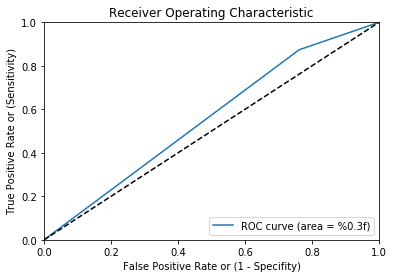

time: 216 ms


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

predicted= model.predict_proba(X_test)[:,1]
y_true = y_test
y_score = [1 if a_ > 0.65 else 0 for a_ in predicted]
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_score,y_true)
# roc_auc = auc(y_true, y_score)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

print("accuracy:-",accuracy_score(y_true, y_score))
print("precision score:-",precision_score(y_true, y_score))
print("recall score:-",recall_score(y_true, y_score))
print("f1 score:-",f1_score(y_true, y_score))
print("AUC :-",roc_auc_score(y_true, y_score))
print(y_true.tolist())
print(y_score)
print(predicted.tolist())


accuracy:- 0.7954545454545454
precision score:- 0.8771929824561403
recall score:- 0.8849557522123894
f1 score:- 0.8810572687224669
AUC :- 0.5740568234746157
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
[0.8, 0.9, 0.8, 0.8, 0.9, 1.0, 1.0, 1.0, 0.6, 0.7

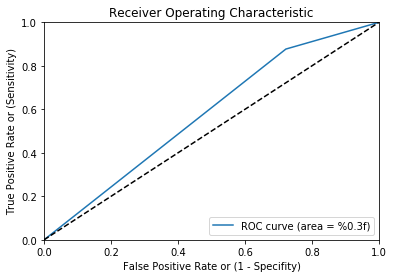

time: 410 ms


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

predicted= model.predict_proba(X_test)[:,1]
y_true = y_test
y_score = [1 if a_ > 0.65 else 0 for a_ in predicted]
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_score,y_true)
# roc_auc = auc(y_true, y_score)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

print("accuracy:-",accuracy_score(y_true, y_score))
print("precision score:-",precision_score(y_true, y_score))
print("recall score:-",recall_score(y_true, y_score))
print("f1 score:-",f1_score(y_true, y_score))
print("AUC :-",roc_auc_score(y_true, y_score))
print(y_true.tolist())
print(y_score)
print(predicted.tolist())
print(confusion_matrix(y_true, y_score))

accuracy:- 0.8409090909090909
precision score:- 0.8709677419354839
recall score:- 0.9557522123893806
f1 score:- 0.9113924050632912
AUC :- 0.556823474615743
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0.9619459614512084, 0.82509332286426, 0.959028023

array([[  3,  16],
       [  5, 108]])

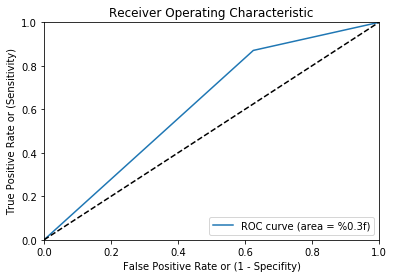

time: 292 ms


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(max_features=8,n_estimators=100,learning_rate=0.05,max_depth=3)
model.fit(X_train, y_train)

predicted= model.predict_proba(X_test)[:,1]
y_true = y_test
y_score = [1 if a_ > 0.62 else 0 for a_ in predicted]
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_score,y_true)
# roc_auc = auc(y_true, y_score)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

print("accuracy:-",accuracy_score(y_true, y_score))
print("precision score:-",precision_score(y_true, y_score))
print("recall score:-",recall_score(y_true, y_score))
print("f1 score:-",f1_score(y_true, y_score))
print("AUC :-",roc_auc_score(y_true, y_score))
print(y_true.tolist())
print(y_score)
print(predicted.tolist())
confusion_matrix(y_true, y_score)

In [ ]:
feature_importance_values = model.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importance_values})
feature_importances.columns = ['feature','importance']

feature_importances.sort_values('importance', ascending=False,inplace=True)
feature_importances.head()

,feature,importance
0,ABB,0.24
1,ATM_WITHDRAWAL,0.22
5,CHEQUE_PAID,0.12
4,UNIFIED_PAYMENT,0.12
8,IMPS,0.09


time: 25.2 ms


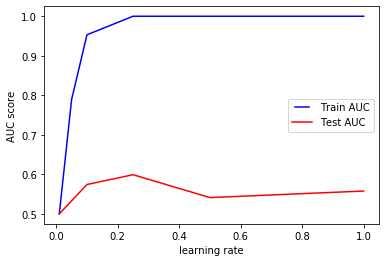

time: 781 ms


In [ ]:
 import matplotlib as mpl
import matplotlib.pyplot as plt

learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train AUC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

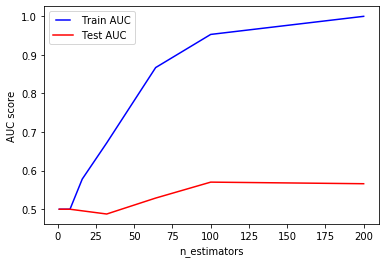

time: 794 ms


In [ ]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()


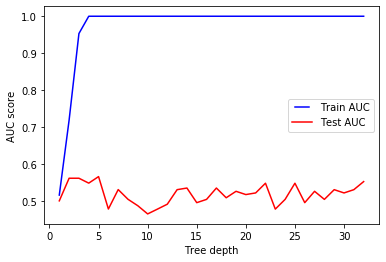

time: 9.3 s


In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   model = GradientBoostingClassifier(max_depth=max_depth)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

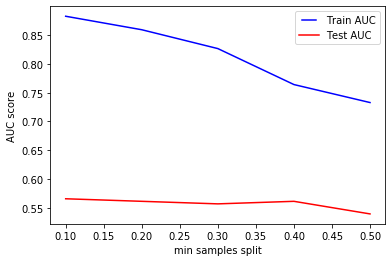

time: 776 ms


In [ ]:
min_samples_splits = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   model = GradientBoostingClassifier(min_samples_split=min_samples_split)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

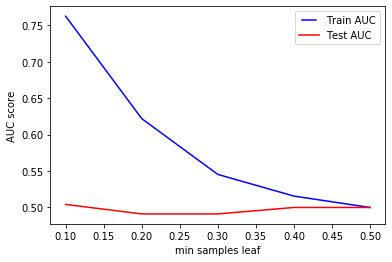

time: 737 ms


In [ ]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   model = GradientBoostingClassifier(min_samples_leaf=min_samples_leaf)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

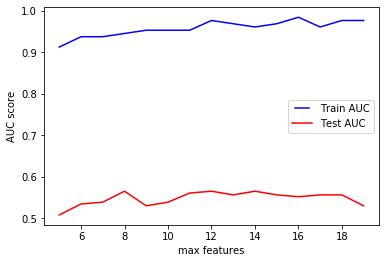

time: 1.5 s


In [ ]:
max_features = list(range(5,X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   model = GradientBoostingClassifier(max_features=max_feature)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()